This project aims to implement a NER Tagger with Pytorch. We will be using the English CONLL 2003 data set.

Data download & description
--------

In [ ]:
from urllib.request import urlretrieve
urlretrieve('https://raw.githubusercontent.com/pranabsarkar/Conll_task/master/conll-2003/eng.train','eng.train')
urlretrieve('https://raw.githubusercontent.com/pranabsarkar/Conll_task/master/conll-2003/eng.testa','eng.testa')

#Prints the beginning of the training set
istream = open('eng.train')
for idx, line in enumerate(istream):
  print(line.strip())

  print(line.strip().split())
  if idx >=3:
    break
istream.close()


-DOCSTART- -X- -X- O
['-DOCSTART-', '-X-', '-X-', 'O']

[]
EU NNP I-NP I-ORG
['EU', 'NNP', 'I-NP', 'I-ORG']
rejects VBZ I-VP O
['rejects', 'VBZ', 'I-VP', 'O']


The CONLL 2003 dataset encodes each token on a single line followed by its annotation. A token line is a quadruple:

> (token,tag,chunk,named entity)

A named entity tagger aims to predict the named entity annotations given the raw tokens. The NER tags follows the IOB convention.
* **I** stands for **Inside** and is used to flag tokens that are part of a named entity.
* **B** stands for **Begin** and is used to flag a token starting a new entity when the preceding token is already part of an entity.
* **O** stands for **Outside** and is used to flag tokens that are not part of a named entity.

The I and B Tag are followed by a specifier. For instance I-PER means that the named entity refers to a person, I-ORG means that the entity is refers to an Organisation.

Sentences are separated by a blank line. The train file is `eng.train`, the dev file is `eng.testa`. I will evaluate your work with a test file unknown to you.
To do this, I will change the content of the dev file



Using CONLL2003 the train file, you will:

* Extract an input vocabulary and create two maps: one mapping tokens to integers and a second mapping integers to tokens (see the pdf notes)
* Include elements in the input vocabulary for padding and for unknown words
* Extract an output vocabulary (the set of NER tags) and returns two maps
mapping tags to integer and vice-versa.

These functionalities should be implemented in a function with signature `vocabulary(filename)` that returns the two maps

In [ ]:
def read_conllu(filename):
  lines = open(filename).readlines()
  sentences = []
  current_sentence = []
  for line in lines:

    line = line.strip() # remove the empty in the beging of seq

    if line.startswith("-DOCSTART-"):
      continue
    # if /n means the end of one sentence
    if not line: # /n not line
      if current_sentence:
        sentences.append(current_sentence)
        current_sentence = []
      continue

    tokens = line.split()
    token_map = {
        "word":tokens[0],
        "pos":tokens[1],
        "chunk":tokens[2],
        "ner":tokens[3]
    }
    current_sentence.append(token_map)
  # process last sentence
  if current_sentence:
    sentences.append(current_sentence)
  return sentences
train_data = read_conllu("./eng.train")


In [ ]:
train_data[-1]

[{'word': 'Swansea', 'pos': 'NN', 'chunk': 'I-NP', 'ner': 'I-ORG'},
 {'word': '1', 'pos': 'CD', 'chunk': 'I-NP', 'ner': 'O'},
 {'word': 'Lincoln', 'pos': 'NNP', 'chunk': 'I-NP', 'ner': 'I-ORG'},
 {'word': '2', 'pos': 'CD', 'chunk': 'I-NP', 'ner': 'O'}]

In [ ]:
sym2idx = {}
for data in train_data:
  for sub_dict in data:
    word = sub_dict['word']
    if word not in sym2idx:
      sym2idx[word] = len(sym2idx)


In [ ]:
words_check = {sub_dict['word'] for data in train_data for sub_dict in data}

In [ ]:
words_check

{'nose',
 'Assoc',
 'Germain',
 '2.777',
 'Brown',
 'campaigning',
 'SARAJEVO',
 '1,429',
 'colourful',
 'PNW',
 '12,900-13,150',
 'Finally',
 'Atlanta',
 'yorker',
 'Bonds',
 '48,000',
 'MS',
 '1995',
 'Bunge',
 '4.38',
 '33969650',
 'Roda',
 'speculated',
 'necessary',
 'rules',
 'Watanabe',
 'single-digits',
 'Firearms',
 'Flemming',
 'street-level',
 'Hubner',
 'Les',
 'consolidating',
 'Freedom',
 'communism',
 'infections',
 'explained',
 'Optimised',
 'Leonard',
 'passes',
 'newly-established',
 'Economic',
 'tough',
 'anti-',
 'November',
 'confiscation',
 'Welspun',
 'board',
 'injection',
 '50',
 'secondary',
 'reports',
 'Lavaggi',
 'Elections',
 'Malik',
 'Put',
 'Actor',
 'engaging',
 'vouch',
 '13',
 'sedan',
 'volunteers',
 'method',
 'Lt.',
 'Non-Callable',
 'races',
 'burned',
 '482-1003',
 'nine-to-one',
 'Displaced',
 '.Giuseppe',
 'inflamation',
 '1,196',
 'texts',
 'Gillian',
 'Beryllium',
 'roadblocks',
 'Jill',
 'front-page',
 'Strategic',
 'Hanover',
 '1996-08-2

In [ ]:
words = {word for data in train_data for sub_dict in data for word in [sub_dict['word']]}

In [ ]:
words

{'nose',
 'Assoc',
 'Germain',
 '2.777',
 'Brown',
 'campaigning',
 'SARAJEVO',
 '1,429',
 'colourful',
 'PNW',
 '12,900-13,150',
 'Finally',
 'Atlanta',
 'yorker',
 'Bonds',
 '48,000',
 'MS',
 '1995',
 'Bunge',
 '4.38',
 '33969650',
 'Roda',
 'speculated',
 'necessary',
 'rules',
 'Watanabe',
 'single-digits',
 'Firearms',
 'Flemming',
 'street-level',
 'Hubner',
 'Les',
 'consolidating',
 'Freedom',
 'communism',
 'infections',
 'explained',
 'Optimised',
 'Leonard',
 'passes',
 'newly-established',
 'Economic',
 'tough',
 'anti-',
 'November',
 'confiscation',
 'Welspun',
 'board',
 'injection',
 '50',
 'secondary',
 'reports',
 'Lavaggi',
 'Elections',
 'Malik',
 'Put',
 'Actor',
 'engaging',
 'vouch',
 '13',
 'sedan',
 'volunteers',
 'method',
 'Lt.',
 'Non-Callable',
 'races',
 'burned',
 '482-1003',
 'nine-to-one',
 'Displaced',
 '.Giuseppe',
 'inflamation',
 '1,196',
 'texts',
 'Gillian',
 'Beryllium',
 'roadblocks',
 'Jill',
 'front-page',
 'Strategic',
 'Hanover',
 '1996-08-2

In [ ]:
sym2idx

{'EU': 0,
 'rejects': 1,
 'German': 2,
 'call': 3,
 'to': 4,
 'boycott': 5,
 'British': 6,
 'lamb': 7,
 '.': 8,
 'Peter': 9,
 'Blackburn': 10,
 'BRUSSELS': 11,
 '1996-08-22': 12,
 'The': 13,
 'European': 14,
 'Commission': 15,
 'said': 16,
 'on': 17,
 'Thursday': 18,
 'it': 19,
 'disagreed': 20,
 'with': 21,
 'advice': 22,
 'consumers': 23,
 'shun': 24,
 'until': 25,
 'scientists': 26,
 'determine': 27,
 'whether': 28,
 'mad': 29,
 'cow': 30,
 'disease': 31,
 'can': 32,
 'be': 33,
 'transmitted': 34,
 'sheep': 35,
 'Germany': 36,
 "'s": 37,
 'representative': 38,
 'the': 39,
 'Union': 40,
 'veterinary': 41,
 'committee': 42,
 'Werner': 43,
 'Zwingmann': 44,
 'Wednesday': 45,
 'should': 46,
 'buy': 47,
 'sheepmeat': 48,
 'from': 49,
 'countries': 50,
 'other': 51,
 'than': 52,
 'Britain': 53,
 'scientific': 54,
 'was': 55,
 'clearer': 56,
 '"': 57,
 'We': 58,
 'do': 59,
 "n't": 60,
 'support': 61,
 'any': 62,
 'such': 63,
 'recommendation': 64,
 'because': 65,
 'we': 66,
 'see': 67,
 'g

In [ ]:
def vocabulary(filename,input_vocab,ner,pos,padding='<pad>',unknown='<unk>'):
    #input_vocab is a boolean flag that tells if we extract input or output vocabulary
    #the two optional flags indicate that a padding and an unknown token
    #have to be added to the vocabulary if their value is not None
    #TODO : return the two vocabulary maps idx2sym and sym2idx
    """
    input means the vocabulary
    output means the tag (ner)
    """
    if input_vocab:
      word_data = read_conllu(filename)
      words = {sub_dict['word'] for data in word_data for sub_dict in data}
    elif ner:
      word_data = read_conllu(filename)
      words = {sub_dict['ner'] for data in word_data for sub_dict in data}
    elif pos:
      word_data = read_conllu(filename)
      words = {sub_dict['pos'] for data in word_data for sub_dict in data}
    # special token, if None
    special_tokens = []
    if padding is not None:
      special_tokens.append(padding)
    if unknown is not None:
      special_tokens.append(unknown)
    idx2sym = special_tokens+list(words)

    sym2idx = {word:idx for idx,word in enumerate(idx2sym)}

    return sym2idx,idx2sym

Now we implement three functions:

* One that performs padding
* The second will encode a sequence of tokens (or a sequence of tags) on integers
* The third will decode as sequence of symbols from integers to strings

At test time, some tokens might not belong to the vocabulary. Ensure that your encoding function does not crash in this case.


In [ ]:
def pad_sequence(sequence,pad_size,pad_token):
    #returns a list with additional pad tokens if needed
    if len(sequence) < pad_size:
      padding = [pad_token]*(pad_size - len(sequence))
      return sequence + padding
    return sequence[:pad_size]

    # pass

def code_sequence(sequence,coding_map,unk_token=None):
    #takes a list of strings and returns a list of integers
    # seq : list
    new_seq = []
    for token in sequence:
      if token in coding_map:
        new_seq.append(coding_map[token])
      elif unk_token is not None:
        new_seq.append(coding_map[unk_token])
      else:
        # token not in dict, no unk, raise error
        raise KeyError(f"Token {token} not in coding_map, and no unk, please consider set unk to a specific token")
    return new_seq



def decode_sequence(sequence,decoding_map):
    #takes a list of integers and returns a list of strings
    #decode map idx2sym list
    return [decoding_map[idx] for idx in sequence]

Data generator
------

In this second exercise, we will write a mini-batch generator.
This is a class in charge of generating randomized batches of data from the dataset. We start by implementing two functions for reading the textfile


In [ ]:
def read_conll_tokens(conllfilename):
    """
    Reads a CONLL 2003 file and returns a list of sentences.
    A sentence is a list of strings (tokens)
    """
    #TODO
    sentences_all = []
    conllu_data_all = read_conllu(conllfilename)
    for sentence_dict in conllu_data_all:
      sentence = [sub_dict['word'] for sub_dict in sentence_dict]
      sentences_all.append(sentence)

    return sentences_all


def read_conll_tags(conllfilename):
    """
    Reads a CONLL 2003 file and returns a list of sentences.
    A sentence is a list of strings (NER-tags)
    """
    #TODO
    pass

    sentences_tags_all = []
    conllu_data_all = read_conllu(conllfilename)
    for sentence_dict in conllu_data_all:
      sentence = [sub_dict['ner'] for sub_dict in sentence_dict]
      sentences_tags_all.append(sentence)

    return sentences_tags_all

#poslayer实现
def read_conll_pos(conllfilename):
  """
  Read a CONLL 2003 file and returns a list of sentences..
  A sentence is a list of strings (POS tagging)
  """
  sentences_tags_all = []
  conllu_data_all = read_conllu(conllfilename)
  for sentence_dict in conllu_data_all:
    sentence = [sub_dict['pos'] for sub_dict in sentence_dict]
    sentences_tags_all.append(sentence)
  return sentences_tags_all

In [ ]:
train_data_sentence =[]
for sentence_dict in train_data:
  sentence = [sub_dict['ner'] for sub_dict in sentence_dict]
  train_data_sentence.append(sentence)
  break
print(train_data_sentence
      )

[['I-ORG', 'O', 'I-MISC', 'O', 'O', 'O', 'I-MISC', 'O', 'O']]




Now we implement the class. You will rely on the helper functions designed above in order to fill in the blanks in the constructor.

In [ ]:
import torch
import torch.nn as nn
from random import shuffle

class DataGenerator:

        #Reuse all relevant helper functions defined above to solve the problems
        def __init__(self,conllfilename, parentgenerator = None, pad_token='<pad>',unk_token='<unk>'):

              if parentgenerator is not None: #Reuse the encodings of the parent if specified
                  self.pad_token      = parentgenerator.pad_token
                  self.unk_token      = parentgenerator.unk_token
                  self.input_sym2idx  = parentgenerator.input_sym2idx
                  self.input_idx2sym  = parentgenerator.input_idx2sym
                  self.output_sym2idx = parentgenerator.output_sym2idx
                  self.output_idx2sym = parentgenerator.output_idx2sym
              else:                           #Creates new encodings
                  self.pad_token = pad_token
                  self.unk_token = unk_token
                  #TODO : Create 4 encoding maps from datafile
                  self.input_sym2idx,self.input_idx2sym   = vocabulary(conllfilename,input_vocab=True,ner=False,pos=False)

                  self.output_sym2idx,self.output_idx2sym = vocabulary(conllfilename,input_vocab=False,ner=True,pos=False)
                  # pass


              #TODO : store the conll dataset with sentence structure (a list of lists of strings) in the following fields
              self.Xtokens = read_conll_tokens(conllfilename)
              self.Ytokens = read_conll_tags(conllfilename)

              # pass


        def generate_batches(self,batch_size):

              #This is an example generator function yielding one batch after another
              #Batches are lists of lists

              assert(len(self.Xtokens) == len(self.Ytokens))

              N     = len(self.Xtokens)
              idxes = list(range(N))

              #Data ordering (try to explain why these 2 lines make sense...)
              """
              shuffle : will mix all the sentence idx
              idxes.sort() will sort all the sentence by its length, that's why if we print seqX, we can always see the sentence that are of length 1 becomes first
              short sentence will be assigned to the batch in the beginning, this will save the padding times, improving efficiency
              maintain randomness as well as improve model training efficiency
              """
              shuffle(idxes)
              idxes.sort(key=lambda idx: len(self.Xtokens[idx]))

              #batch generation
              bstart = 0
              while bstart < N:
                 bend        = min(bstart+batch_size,N)
                 batch_idxes = idxes[bstart:bend]
                 batch_len   = max(len(self.Xtokens[idx]) for idx in batch_idxes)

                 seqX = [ pad_sequence(self.Xtokens[idx],batch_len,self.pad_token) for idx in batch_idxes]
                 seqY = [ pad_sequence(self.Ytokens[idx],batch_len,self.pad_token) for idx in batch_idxes]

                 seqX = [ code_sequence(seq,self.input_sym2idx,self.unk_token) for seq in seqX]
                 seqY = [ code_sequence(seq,self.output_sym2idx) for seq in seqY]

                 assert(len(seqX) == len(seqY))
                 yield (seqX,seqY)
                 bstart += batch_size

In [ ]:
generator = DataGenerator("./eng.train")
####
for seqX,seqY in generator.generate_batches(3):
  # print(seqX)
  X = torch.LongTensor(seqX)
  print(X.shape)
  break

torch.Size([3, 1])


In [ ]:
for idx,(batch_x,batch_y) in enumerate(generator.generate_batches(20)):
  print(batch_x)
  break

[[4788], [13851], [15358], [685], [4340], [16504], [12388], [22554], [13947], [4903], [529], [19898], [9834], [2921], [5312], [22635], [3062], [10826], [2761], [10826]]


Implement the tagger
---------------
This is the core exercise. There are three main tasks:
* Implement parameter allocation. This implies allocating the embedding layer, the LSTM (or bi-LSTM) layer and the Linear Layer.
* Implement the forward method. This method expects a tensor encoding the input and outputs a tensor of predictions
* Implement the train method

The evaluation (`validate`) method is given and cannot be modified. But it can be used as source of inspiration for implementing the train method.

In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

class NERtagger(nn.Module):

    def __init__(self, traingenerator, embedding_size, hidden_size, device='cpu'):
        super(NERtagger, self).__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.allocate_params(traingenerator, device)
        self.device = device
        self.to(self.device)

    def load(self, filename):
        self.load_state_dict(torch.load(filename))

    def allocate_params(self, datagenerator, device):
        vocab_size = len(datagenerator.input_idx2sym)
        out_size = len(datagenerator.output_idx2sym)
        self.word_embedding = nn.Embedding(vocab_size, self.embedding_size)
        self.lstm = nn.LSTM(self.embedding_size, self.hidden_size)
        self.linear_proj = nn.Linear(self.hidden_size, out_size)

    def forward(self, Xinput):
        embed = self.word_embedding(Xinput)
        embed = embed.transpose(0, 1)
        lstm_out, _ = self.lstm(embed)
        lstm_out = lstm_out.transpose(0, 1)
        tag_out = self.linear_proj(lstm_out)
        tag_scores = F.log_softmax(tag_out, dim=-1)
        return tag_scores

    def train_model(self, traingenerator, validgenerator, epochs, batch_size, device='cpu', learning_rate=0.001, patience=3):
        self.minloss = float('inf')
        pad_index = traingenerator.output_sym2idx[traingenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        avg_losses = []
        avg_valid_losses = []
        no_improve_count = 0

        for epoch in range(epochs):
            epoch_loss = []
            epoch_acc = []

            self.train()  # Set model to training mode
            for (SeqX, SeqY) in traingenerator.generate_batches(batch_size):
                SeqX = torch.LongTensor(SeqX).to(self.device)
                SeqY = torch.LongTensor(SeqY).to(self.device)
                optimizer.zero_grad()
                y_pred = self.forward(SeqX)

                batch_size, seq_y_len = SeqY.shape
                y_pred = y_pred.view(batch_size * seq_y_len, -1)
                SeqY = SeqY.view(batch_size * seq_y_len)
                loss = loss_fnc(y_pred, SeqY)

                loss.backward()
                optimizer.step()

                epoch_loss.append(loss.item())
                mask = (SeqY != pad_index)
                y_argmax = torch.argmax(y_pred, dim=-1)
                correct = torch.sum((y_argmax == SeqY) * mask)
                total = torch.sum(mask)
                epoch_acc.append(float(correct) / float(total))

            avg_loss = sum(epoch_loss) / len(epoch_loss)
            avg_losses.append(avg_loss)
            print(f'Epoch {epoch+1}/{epochs}')
            print(f'Training - Loss: {avg_loss:.4f}, Accuracy: {sum(epoch_acc) / len(epoch_acc):.4f}')

            # Validation step
            valid_loss = self.validate(validgenerator, batch_size)
            avg_valid_losses.append(valid_loss)

            # Early stopping check
            if valid_loss < self.minloss:
                self.minloss = valid_loss
                torch.save(self.state_dict(), 'tagger_params.pt')
                no_improve_count = 0
            else:
                no_improve_count += 1
                if no_improve_count >= patience:
                    print("Early stopping triggered.")
                    break

        # Plotting training and validation losses
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(avg_losses)), avg_losses, label='Training Loss')
        plt.plot(range(len(avg_valid_losses)), avg_valid_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

    def validate(self, datagenerator, batch_size, device='cpu'):
        self.eval()  # Set model to evaluation mode
        pad_index = datagenerator.output_sym2idx[datagenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)
        batch_losses = []
        batch_accuracies = []

        with torch.no_grad():
            for (seqX, seqY) in datagenerator.generate_batches(batch_size):
                X = torch.LongTensor(seqX).to(self.device)
                Y = torch.LongTensor(seqY).to(self.device)
                Yhat = self.forward(X)

                batch_size, seq_len = Y.shape
                Yhat = Yhat.view(batch_size * seq_len, -1)
                Y = Y.view(batch_size * seq_len)
                loss = loss_fnc(Yhat, Y)
                batch_losses.append(loss.item())

                mask = (Y != pad_index)
                Yargmax = torch.argmax(Yhat, dim=1)
                correct = torch.sum((Yargmax == Y) * mask)
                total = torch.sum(mask)
                batch_accuracies.append(float(correct) / float(total))

        valid_loss = sum(batch_losses) / len(batch_losses)
        print(f'[Validation] Mean Loss = {valid_loss:.4f}, Mean Accuracy = {sum(batch_accuracies) / len(batch_accuracies):.4f}')
        return valid_loss

The main program is the following. You are expected to add code for searching for hyperparameters that maximise the validation score

Epoch 1/20
Training - Loss: 0.8203, Accuracy: 0.7734
[Validation] Mean Loss = 0.6375, Mean Accuracy = 0.7843
Epoch 2/20
Training - Loss: 0.4898, Accuracy: 0.8346
[Validation] Mean Loss = 0.4588, Mean Accuracy = 0.8402
Epoch 3/20
Training - Loss: 0.3139, Accuracy: 0.8956
[Validation] Mean Loss = 0.3627, Mean Accuracy = 0.8778
Epoch 4/20
Training - Loss: 0.1995, Accuracy: 0.9350
[Validation] Mean Loss = 0.3109, Mean Accuracy = 0.8991
Epoch 5/20
Training - Loss: 0.1333, Accuracy: 0.9580
[Validation] Mean Loss = 0.2979, Mean Accuracy = 0.8958
Epoch 6/20
Training - Loss: 0.0720, Accuracy: 0.9773
[Validation] Mean Loss = 0.3116, Mean Accuracy = 0.9061
Epoch 7/20
Training - Loss: 0.0403, Accuracy: 0.9879
[Validation] Mean Loss = 0.3462, Mean Accuracy = 0.9034
Epoch 8/20
Training - Loss: 0.0259, Accuracy: 0.9927
[Validation] Mean Loss = 0.4073, Mean Accuracy = 0.9001
Early stopping triggered.


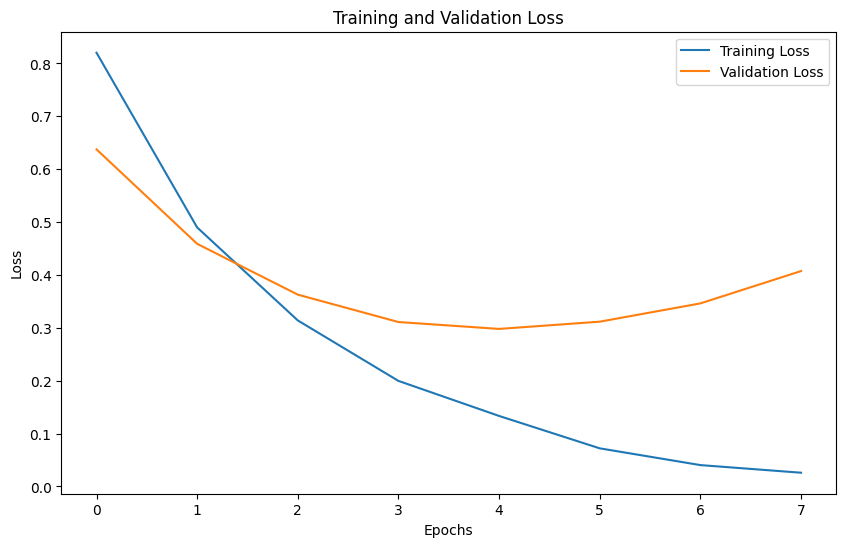

In [ ]:
trainset = DataGenerator('eng.train')
validset = DataGenerator('eng.testa',parentgenerator = trainset)
tagger   = NERtagger(trainset,64,128,device='cuda')
tagger.train_model(trainset, validset, 20, 32)

#ADD CODE for searching reasonable hyperparameters

In [ ]:
counter = 0
for (seqx, seqy) in trainset.generate_batches(3):
    seqx_tensor = torch.LongTensor(seqx).to(tagger.device)  # Convert seqx to a tensor and move to device if needed
    print(seqx)
    print(seqy)
    print(tagger.forward(seqx_tensor))  # Pass the tensor instead of a list
    counter += 1
    if counter >= 100:
        break

[[20705], [2940], [2940]]
[[9], [9], [9]]
tensor([[[-3.6553e+01, -3.6391e+01, -2.6816e+01, -2.2626e+01, -2.7240e+01,
          -2.3574e+01, -3.8989e+01, -2.6255e+01, -3.1699e+01,  0.0000e+00]],

        [[-1.9793e+01, -1.9812e+01, -1.6787e+01, -1.0435e+01, -1.4330e+01,
          -1.5585e+01, -1.8544e+01, -1.5937e+01, -1.7134e+01, -3.0279e-05]],

        [[-1.9793e+01, -1.9812e+01, -1.6787e+01, -1.0435e+01, -1.4330e+01,
          -1.5585e+01, -1.8544e+01, -1.5937e+01, -1.7134e+01, -3.0279e-05]]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
[[6065], [15912], [2940]]
[[9], [9], [9]]
tensor([[[-2.8214e+01, -2.8424e+01, -2.4130e+01, -2.2611e+01, -2.1284e+01,
          -2.1487e+01, -2.8091e+01, -2.4872e+01, -2.3827e+01,  0.0000e+00]],

        [[-2.5049e+01, -2.4791e+01, -1.9323e+01, -9.8104e+00, -1.4934e+01,
          -1.5137e+01, -2.5157e+01, -1.0326e+01, -2.0718e+01, -8.8211e-05]],

        [[-1.9793e+01, -1.9812e+01, -1.6787e+01, -1.0435e+01, -1.4330e+01,
          -1.5585e+01

Improve the tagger
----------

This exercise is relatively free. You may add improvements to the basic tagger.
Note that I expect that improving the management of unknown words and of subword units is key on this task. You may wish to:
* Add an attention layer
* Use part of speech tags embeddings as additional inputs
* Find a way to learn a word embedding for unknown words
* Integrate your convolutional word embedding module into the tagger
* ...

Describe your improvements below and point me out the name(s) of the function(s)
where they are implemented.


### Attention

scaled dot-production attention
Attention(Q, K, V) = softmax(QK^T / sqrt(d_k))V

In [ ]:
class SelfAttention(nn.Module):
  def __init__(self,hidden_size):
    super(SelfAttention,self).__init__()
    self.hidden_size = hidden_size
    # linear proj
    self.W_Q = nn.Linear(hidden_size,hidden_size)
    self.W_K = nn.Linear(hidden_size,hidden_size)
    self.W_V = nn.Linear(hidden_size,hidden_size)
    # sqrt dk
    self.scale = None

  def forward(self,x,mask=None):
    # X :hidden state[batch_size,seq_len,hidden_state]
    if self.scale is None:
      self.scale = torch.sqrt(torch.FloatTensor([self.hidden_size])).to(x.device)

    #1. get QKV
    Q = self.W_Q(x) # [batch_size,seq_len,hidden_size]
    K = self.W_K(x) # [batch_size,seq_len,hidden_size]
    V = self.W_V(x) # [batch_size,seq_len,hidden_size]

    #2. calculate attn
    # K.transpose(-2,-1) # [batch_size,hidden_state,seq_len]
    attn = torch.matmul(Q,K.transpose(-2,-1))/self.scale # [batch_size,seq_len,seq_len]

    # #if mask not none: process pad
    if mask is not None:
      attn_mask = mask.unsqueeze(1).expand(-1,mask.size(1),-1)
      attn = attn.masked_fill(~attn_mask,float('-inf') ) # -inf will be 0 after softmax


    #3. softmax
    attn =F.softmax(attn,dim=-1) # [batch_size,seq_len,seq_len]

    # V
    x = torch.matmul(attn,V) # [batch_size, seq_len,hidden_state]

    return x

In [ ]:
class NERtagger_attn(nn.Module):

    def __init__(self, traingenerator, embedding_size, hidden_size, dropout, device='cpu'):
        super(NERtagger_attn, self).__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.allocate_params(traingenerator, device)
        self.device = device
        self.dropout = nn.Dropout(dropout)
        self.to(self.device)

    def load(self, filename):
        self.load_state_dict(torch.load(filename))

    def allocate_params(self, datagenerator, device):
        vocab_size = len(datagenerator.input_idx2sym)
        out_size = len(datagenerator.output_idx2sym)
        self.word_embedding = nn.Embedding(vocab_size, self.embedding_size)
        self.lstm = nn.LSTM(self.embedding_size, self.hidden_size)
        self.scaled_dot_attn = SelfAttention(self.hidden_size)
        self.linear_proj = nn.Linear(self.hidden_size, out_size)

    def forward(self, Xinput):
        embed = self.word_embedding(Xinput)
        embed = embed.transpose(0, 1)
        lstm_out, _ = self.lstm(embed)
        lstm_out = lstm_out.transpose(0, 1)
        lstm_out = self.dropout(lstm_out)
        attention_score = self.scaled_dot_attn(lstm_out)
        tag_out = self.linear_proj(attention_score)
        tag_scores = F.log_softmax(tag_out, dim=-1)
        return tag_scores

    def train_model(self, traingenerator, validgenerator, epochs, batch_size, device='cpu', learning_rate=0.001, patience=5):
        self.minloss = float('inf')
        pad_index = traingenerator.output_sym2idx[traingenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        # Track losses and accuracies for plotting
        train_losses = []
        valid_losses = []
        train_accuracies = []
        valid_accuracies = []

        # Early stopping variables
        no_improve_epochs = 0

        for epoch in range(epochs):
            self.train()
            epoch_loss = []
            epoch_acc = []

            for SeqX, SeqY in traingenerator.generate_batches(batch_size):
                SeqX = torch.LongTensor(SeqX).to(self.device)
                SeqY = torch.LongTensor(SeqY).to(self.device)
                optimizer.zero_grad()

                y_pred = self.forward(SeqX)
                batch_size, seq_y_len = SeqY.shape
                y_pred = y_pred.view(batch_size * seq_y_len, -1)
                SeqY = SeqY.view(batch_size * seq_y_len)
                loss = loss_fnc(y_pred, SeqY)
                loss.backward()
                optimizer.step()

                epoch_loss.append(loss.item())

                # Accuracy
                mask = (SeqY != pad_index)
                y_argmax = torch.argmax(y_pred, dim=-1)
                correct = torch.sum((y_argmax == SeqY) * mask)
                total = torch.sum(mask)
                epoch_acc.append(float(correct) / float(total))

            avg_train_loss = sum(epoch_loss) / len(epoch_loss)
            avg_train_acc = sum(epoch_acc) / len(epoch_acc)
            train_losses.append(avg_train_loss)
            train_accuracies.append(avg_train_acc)

            # Validation
            valid_loss, valid_acc = self.validate(validgenerator, batch_size, device, save_min_model=True)
            valid_losses.append(valid_loss)
            valid_accuracies.append(valid_acc)

            # Print results for each epoch
            print(f'Epoch {epoch + 1}/{epochs}')
            print(f'Training - Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}')
            print(f'[Validation] Mean Loss = {valid_loss:.4f}, Mean Accuracy = {valid_acc:.4f}')

            # Early stopping check
            if valid_loss < self.minloss:
                self.minloss = valid_loss
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1

            if no_improve_epochs >= patience:
                print("Early stopping triggered.")
                break

        # Plotting training and validation losses
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(valid_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()


    def validate(self, datagenerator, batch_size, device='cpu', save_min_model=False):
        batch_accuracies = []
        batch_losses = []
        pad_index = datagenerator.output_sym2idx[datagenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)

        for seqX, seqY in datagenerator.generate_batches(batch_size):
            with torch.no_grad():
                X = torch.LongTensor(seqX).to(self.device)
                Y = torch.LongTensor(seqY).to(self.device)
                Yhat = self.forward(X)

                batch_size, seq_len = Y.shape
                Yhat = Yhat.view(batch_size * seq_len, -1)
                Y = Y.view(batch_size * seq_len)
                loss = loss_fnc(Yhat, Y)
                batch_losses.append(loss.item())

                mask = (Y != pad_index)
                Yargmax = torch.argmax(Yhat, dim=1)
                correct = torch.sum((Yargmax == Y) * mask)
                total = torch.sum(mask)
                batch_accuracies.append(float(correct) / float(total))

        valid_loss = sum(batch_losses) / len(batch_losses)
        valid_acc = sum(batch_accuracies) / len(batch_accuracies)

        if save_min_model and valid_loss < self.minloss:
            self.minloss = valid_loss
            torch.save(self.state_dict(), 'tagger_params.pt')

        return valid_loss, valid_acc


Epoch 1/30
Training - Loss: 0.8885, Accuracy: 0.7541
[Validation] Mean Loss = 0.7721, Mean Accuracy = 0.7681
Epoch 2/30
Training - Loss: 0.5791, Accuracy: 0.8000
[Validation] Mean Loss = 0.5886, Mean Accuracy = 0.8037
Epoch 3/30
Training - Loss: 0.3979, Accuracy: 0.8611
[Validation] Mean Loss = 0.4697, Mean Accuracy = 0.8440
Epoch 4/30
Training - Loss: 0.2719, Accuracy: 0.9085
[Validation] Mean Loss = 0.3872, Mean Accuracy = 0.8718
Epoch 5/30
Training - Loss: 0.2151, Accuracy: 0.9303
[Validation] Mean Loss = 0.3626, Mean Accuracy = 0.8791
Early stopping triggered.


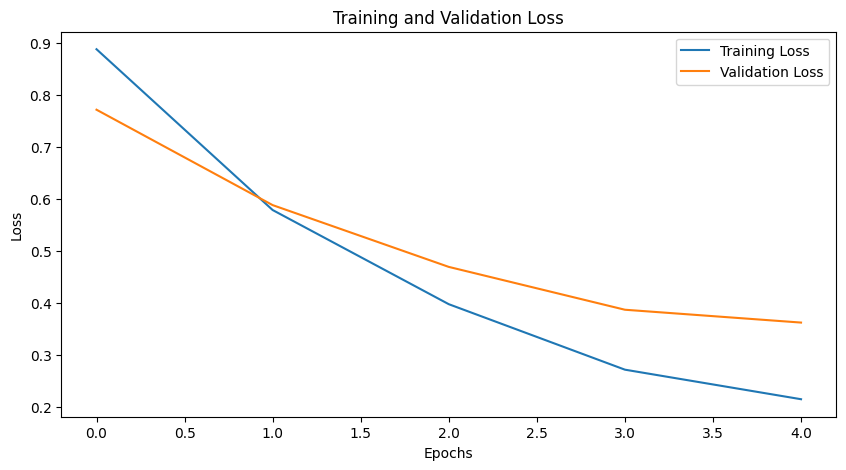

In [ ]:
trainset = DataGenerator('eng.train')
validset = DataGenerator('eng.testa', parentgenerator = trainset)
tagger_attn   = NERtagger_attn(trainset,64,128,0.3,device='cuda')
tagger_attn.train_model(trainset,validset,30,64)

#ADD CODE for searching reasonable hyperparameters

# pos layer


In [ ]:
import torch
import torch.nn as nn
from random import shuffle

class DataGenerator_pos:

        #Reuse all relevant helper functions defined above to solve the problems
        def __init__(self,conllfilename, parentgenerator = None, pad_token='<pad>',unk_token='<unk>'):

              if parentgenerator is not None: #Reuse the encodings of the parent if specified
                  self.pad_token      = parentgenerator.pad_token
                  self.unk_token      = parentgenerator.unk_token
                  self.input_sym2idx  = parentgenerator.input_sym2idx
                  self.input_idx2sym  = parentgenerator.input_idx2sym
                  self.pos_sym2idx = parentgenerator.pos_sym2idx
                  self.pos_idx2sym = parentgenerator.pos_idx2sym
                  self.output_sym2idx = parentgenerator.output_sym2idx
                  self.output_idx2sym = parentgenerator.output_idx2sym
              else:                           #Creates new encodings
                  self.pad_token = pad_token
                  self.unk_token = unk_token
                  #TODO : Create 4 encoding maps from datafile
                  self.input_sym2idx,self.input_idx2sym   = vocabulary(conllfilename,input_vocab=True,ner=False,pos=False)
                  self.pos_sym2idx,self.pos_idx2sym = vocabulary(conllfilename,input_vocab=False,ner=False,pos=True)
                  self.output_sym2idx,self.output_idx2sym = vocabulary(conllfilename,input_vocab=False,ner=True,pos=False)
                  # pass


              #TODO : store the conll dataset with sentence structure (a list of lists of strings) in the following fields
              self.Xtokens = read_conll_tokens(conllfilename)
              self.Ytokens = read_conll_tags(conllfilename)
              self.XPos = read_conll_pos(conllfilename)
              # pass


        def generate_batches(self,batch_size):

              #This is an example generator function yielding one batch after another
              #Batches are lists of lists

              assert(len(self.Xtokens) == len(self.Ytokens))

              N     = len(self.Xtokens)
              idxes = list(range(N))

              #Data ordering (try to explain why these 2 lines make sense...)
              """
              shuffle : will mix all the sentence idx
              idxes.sort() will sort all the sentence by its length, that's why if we print seqX, we can always see the sentence that are of length 1 becomes first
              short sentence will be assigned to the batch in the beginning, this will save the padding times, improving efficiency
              maintain randomness as well as improve model training efficiency
              """
              shuffle(idxes)
              idxes.sort(key=lambda idx: len(self.Xtokens[idx]))

              #batch generation
              bstart = 0
              while bstart < N:
                 bend        = min(bstart+batch_size,N)
                 batch_idxes = idxes[bstart:bend]
                 batch_len   = max(len(self.Xtokens[idx]) for idx in batch_idxes)

                 seqX = [ pad_sequence(self.Xtokens[idx],batch_len,self.pad_token) for idx in batch_idxes]
                 seqXPos = [pad_sequence(self.XPos[idx],batch_len,self.pad_token) for idx in batch_idxes]
                 seqY = [ pad_sequence(self.Ytokens[idx],batch_len,self.pad_token) for idx in batch_idxes]

                 seqX = [ code_sequence(seq,self.input_sym2idx,self.unk_token) for seq in seqX]
                 seqXPos = [ code_sequence(seq,self.pos_sym2idx,self.unk_token) for seq in seqXPos]
                 seqY = [ code_sequence(seq,self.output_sym2idx) for seq in seqY]

                 assert(len(seqX) == len(seqY))
                 yield (seqX,seqXPos,seqY)
                 bstart += batch_size

In [ ]:
class NERtagger_attn_pos(nn.Module):

    def __init__(self, traingenerator, embedding_size, hidden_size, dropout, device='cpu'):
        super(NERtagger_attn_pos, self).__init__()
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.allocate_params(traingenerator, device)
        self.device = device
        self.dropout = nn.Dropout(dropout)
        self.to(self.device)

    def load(self, filename):
        self.load_state_dict(torch.load(filename))

    def allocate_params(self, datagenerator, device):
        vocab_size = len(datagenerator.input_idx2sym)
        pos_size = len(datagenerator.pos_idx2sym)
        out_size = len(datagenerator.output_idx2sym)
        self.word_embedding = nn.Embedding(vocab_size, self.embedding_size)
        self.pos_embedding = nn.Embedding(pos_size, self.embedding_size)
        self.lstm = nn.LSTM(self.embedding_size * 2, self.hidden_size)
        self.scaled_dot_attn = SelfAttention(self.hidden_size)
        self.linear_proj = nn.Linear(self.hidden_size, out_size)

    def forward(self, Xinput, Xpos):
        embed = self.word_embedding(Xinput)
        embed_pos = self.pos_embedding(Xpos)
        embed_concat = torch.cat([embed, embed_pos], dim=-1)
        embed_concat = embed_concat.transpose(0, 1)
        lstm_out, _ = self.lstm(embed_concat)
        lstm_out = lstm_out.transpose(0, 1)
        lstm_out = self.dropout(lstm_out)
        attention_score = self.scaled_dot_attn(lstm_out)
        tag_out = self.linear_proj(attention_score)
        tag_scores = F.log_softmax(tag_out, dim=-1)
        return tag_scores

    def train_model(self, traingenerator, validgenerator, epochs, batch_size, device='cpu', learning_rate=0.001, patience=5):
        self.minloss = float('inf')
        pad_index = traingenerator.output_sym2idx[traingenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        # Track losses and accuracies for plotting
        train_losses = []
        valid_losses = []
        train_accuracies = []
        valid_accuracies = []

        # Early stopping variables
        no_improve_epochs = 0

        for epoch in range(epochs):
            self.train()
            epoch_loss = []
            epoch_acc = []

            for SeqX, SeqXpos, SeqY in traingenerator.generate_batches(batch_size):
                SeqX = torch.LongTensor(SeqX).to(self.device)
                SeqXpos = torch.LongTensor(SeqXpos).to(self.device)
                SeqY = torch.LongTensor(SeqY).to(self.device)
                optimizer.zero_grad()

                y_pred = self.forward(SeqX, SeqXpos)
                batch_size, seq_y_len = SeqY.shape
                y_pred = y_pred.view(batch_size * seq_y_len, -1)
                SeqY = SeqY.view(batch_size * seq_y_len)
                loss = loss_fnc(y_pred, SeqY)
                loss.backward()
                optimizer.step()

                epoch_loss.append(loss.item())

                # Accuracy calculation
                mask = (SeqY != pad_index)
                y_argmax = torch.argmax(y_pred, dim=-1)
                correct = torch.sum((y_argmax == SeqY) * mask)
                total = torch.sum(mask)
                epoch_acc.append(float(correct) / float(total))

            avg_train_loss = sum(epoch_loss) / len(epoch_loss)
            avg_train_acc = sum(epoch_acc) / len(epoch_acc)
            train_losses.append(avg_train_loss)
            train_accuracies.append(avg_train_acc)

            # Validation
            valid_loss, valid_acc = self.validate(validgenerator, batch_size, device, save_min_model=True)
            valid_losses.append(valid_loss)
            valid_accuracies.append(valid_acc)

            # Print epoch results
            print(f'Epoch {epoch + 1}/{epochs}')
            print(f'Training - Loss: {avg_train_loss:.4f}, Accuracy: {avg_train_acc:.4f}')
            print(f'[Validation] Mean Loss = {valid_loss:.4f}, Mean Accuracy = {valid_acc:.4f}')

            # Early stopping check
            if valid_loss < self.minloss:
                self.minloss = valid_loss
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1

            if no_improve_epochs >= patience:
                print("Early stopping triggered.")
                break

        # Plotting training and validation losses
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(valid_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()

    def validate(self, datagenerator, batch_size, device='cpu', save_min_model=False):
        batch_accuracies = []
        batch_losses = []
        pad_index = datagenerator.output_sym2idx[datagenerator.pad_token]
        loss_fnc = nn.CrossEntropyLoss(ignore_index=pad_index)

        for seqX, SeqXpos, seqY in datagenerator.generate_batches(batch_size):
            with torch.no_grad():
                X = torch.LongTensor(seqX).to(self.device)
                Xpos = torch.LongTensor(SeqXpos).to(self.device)
                Y = torch.LongTensor(seqY).to(self.device)

                Yhat = self.forward(X, Xpos)

                # Flattening and loss computation
                batch_size, seq_len = Y.shape
                Yhat = Yhat.view(batch_size * seq_len, -1)
                Y = Y.view(batch_size * seq_len)
                loss = loss_fnc(Yhat, Y)
                batch_losses.append(loss.item())

                # Accuracy computation
                mask = (Y != pad_index)
                Yargmax = torch.argmax(Yhat, dim=1)
                correct = torch.sum((Yargmax == Y) * mask)
                total = torch.sum(mask)
                batch_accuracies.append(float(correct) / float(total))

        valid_loss = sum(batch_losses) / len(batch_losses)
        valid_acc = sum(batch_accuracies) / len(batch_accuracies)

        if save_min_model and valid_loss < self.minloss:
            self.minloss = valid_loss
            torch.save(self.state_dict(), 'tagger_params.pt')

        return valid_loss, valid_acc

Epoch 1/30
Training - Loss: 0.6091, Accuracy: 0.8033
[Validation] Mean Loss = 0.5326, Mean Accuracy = 0.7936
Epoch 2/30
Training - Loss: 0.3632, Accuracy: 0.8753
[Validation] Mean Loss = 0.4270, Mean Accuracy = 0.8424
Epoch 3/30
Training - Loss: 0.2447, Accuracy: 0.9187
[Validation] Mean Loss = 0.3329, Mean Accuracy = 0.8885
Epoch 4/30
Training - Loss: 0.1773, Accuracy: 0.9427
[Validation] Mean Loss = 0.2929, Mean Accuracy = 0.9031
Epoch 5/30
Training - Loss: 0.1649, Accuracy: 0.9485
[Validation] Mean Loss = 0.3152, Mean Accuracy = 0.8991
Early stopping triggered.


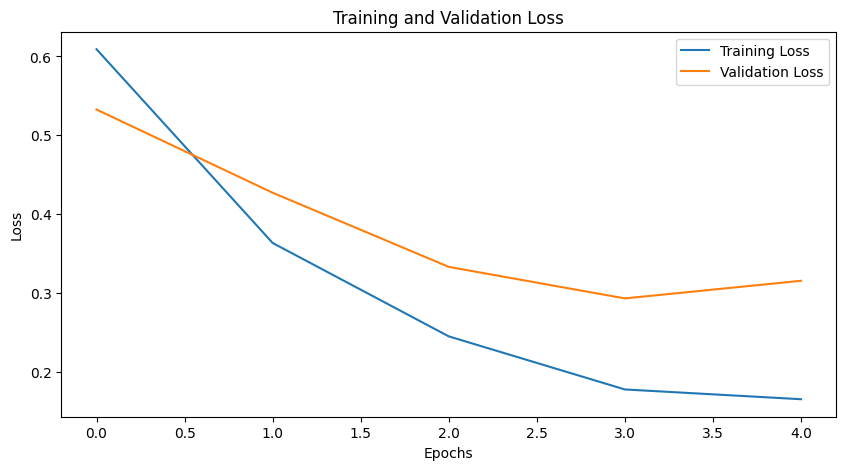

In [ ]:
trainset_withpos = DataGenerator_pos('eng.train')
validset_withpos = DataGenerator_pos('eng.testa',parentgenerator = trainset_withpos)
tagger_attn   = NERtagger_attn_pos(trainset_withpos,64,128,0.3,device='cuda')
tagger_attn.train_model(trainset_withpos,validset_withpos,30,64)